# COURSE: A deep understanding of deep learning
## SECTION: Autoencoders
### LECTURE: Denoising MNIST
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202108

In [12]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-12-c3fe6799ddb5>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


# Import and process the data

In [13]:
# import dataset (comes with colab!)
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')


# don't need labels!
data = data[:,1:]

# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

# convert to tensor
dataT = torch.tensor( dataNorm,dtype =torch.float32)# ,dtype= torch.float16 )

In [14]:
# data[data>0] = 1

In [16]:
def pops(dack,liste):
  for i in liste:
    dack.pop(i)
  # return dack  # pop мутирует список тоесть даже можно и не возращать его
# pops(dict23,[6,7,8,9,10)

In [17]:

#   print(indexes[2])
#   indexes[ce] =
#   indexes = np.array(list(set(indexes)),dtype=int)[:-1]

# print(ce.shape)


# Create the DL model

In [18]:
# create a class for the model
def createTheMNISTAE(encod,bott):

  class aenet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,encod)#dtype= torch.float16)

      ### encoder layer
      self.enc = nn.Linear(encod,bott)#dtype= torch.float16)

      ### latent layer
      self.lat = nn.Linear(bott,encod)#dtype= torch.float16)

      ### decoder layer
      self.dec = nn.Linear(encod,784)#dtype= torch.float16)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.enc(x) )
      x = F.relu( self.lat(x) )
      y = torch.sigmoid( self.dec(x) )
      return y

  # create the model instance
  net = aenet()

  # loss function
  lossfun = nn.BCELoss()

  # optimizer
  optimizer = torch.optim.Adam(net.parameters(),lr=.001)

  return net,lossfun,optimizer

In [19]:
# test the model with a bit of data
net,lossfun,optimizer = createTheMNISTAE()

X = dataT[:5,:]
yHat = net(X)

print(X.shape)
print(yHat.shape)

TypeError: createTheMNISTAE() missing 2 required positional arguments: 'encod' and 'bott'

In [20]:
data_dict23= {i:dataT[i] for i in range(20000) } # не оптим вариант ==data_dict23= {i:j for i in range(20000)for j in data_dict23}
# data_dict23


NameError: name 'X' is not defined

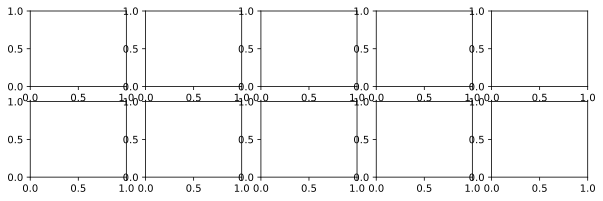

In [21]:
# let's see what the model did!
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.suptitle('Yikes!!!')
plt.show()

# Create a function that trains the model

In [22]:
import copy
def function2trainTheModel(enc,bot):

  # number of epochs
  numepochs = 1

  # create a new model
  net,lossfun,optimizer = createTheMNISTAE(enc,bot)

  # initialize losses
  losses = torch.zeros(numepochs)
  batch_size = 20

  # loop over epochs
  for epochi in range(numepochs):

    data_dict23= {i:dataT[i] for i in range(20000) }  # data_dict23_copy = copy.deepcopy(data_dict23) можно так но это медленее
    batchloss = [0]*batch_size
    for i in range(batch_size):
      ce = np.random.choice(np.array(list(data_dict23.keys())), int(len(data)/batch_size),replace = False)
    # select a random set of images

      X = dataT[ce,:]
      pops(data_dict23,ce)

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,X)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    # losses in last buch epoch
      batchloss[i] =  loss.item()
    losses[epochi] =  torch.mean(torch.tensor(batchloss))
  # end epochs
  # function outpuT
  return losses,net

# Run the model and show the results!

Final loss: 0.4858


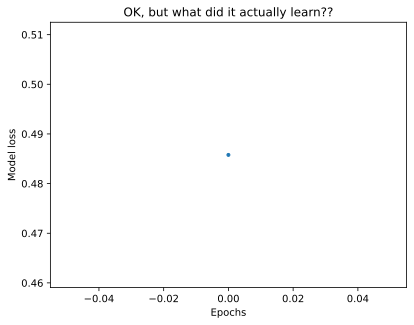

In [23]:
# train the model (90s)
losses,net= function2trainTheModel(250,50)
print(f'Final loss: {losses[-1]:.4f}')

# visualize the losses
plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.title('OK, but what did it actually learn??')
plt.show()
# я немножко оптисизировал модельку посмотри что будет с ней а именно с 32 бит float в 16-битный float

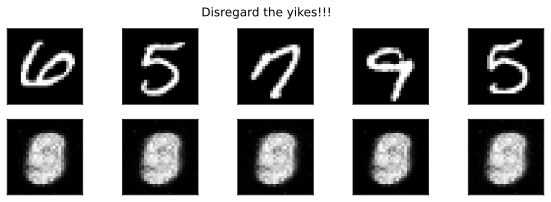

In [24]:
# Repeat the visualization when testing the model
X = dataT[:5,:]
yHat = net(X)


# let's see what the model did!
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.suptitle('Disregard the yikes!!!')
plt.show()

# Add noise to see a use case of an autoencoder

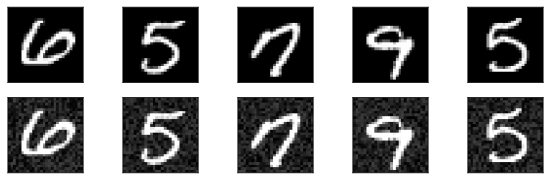

In [25]:
# grab a small set of images
X = dataT[:10,:]

# add noise
Xnoise = X + torch.rand_like(X)/ 4#- 0.9

# clip at 1
# Xnoise[Xnoise<0] = -10
Xnoise[Xnoise>1] = 1

# show the noisy images
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.show()

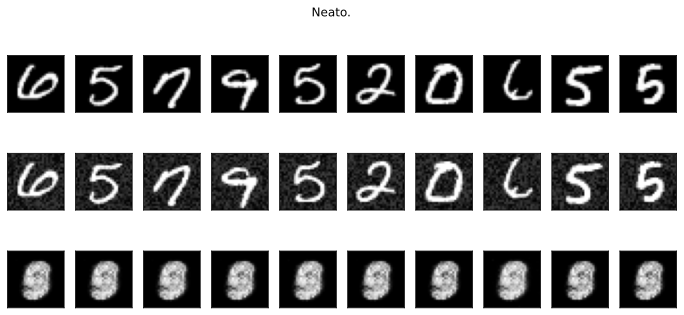

In [26]:
# run through the model
Y = net(Xnoise)


# show the noisy images
fig,axs = plt.subplots(3,10,figsize=(12,5))

for i in range(10):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[2,i].imshow(Y[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  axs[2,i].set_xticks([]), axs[2,i].set_yticks([])

plt.suptitle('Neato.')
plt.show()

In [96]:
import sys
from IPython.display import clear_output
encod = np.linspace(10,500,12)
bott = np.linspace(5,100,8)
losses_real = torch.zeros(96)
i = 0

for enc in encod:
  for bot in bott:

    losses,net= function2trainTheModel(int(enc),int(bot))

    losses_real[i] = (torch.mean(losses[-4:]))
    i+=1
    clear_output(True)
    # clear_output(False)
    fat =f'THE NUMBOR OF model {i}/{96}'
    s= sys.intern(fat)
    print(s)

THE NUMBOR OF model 96/96


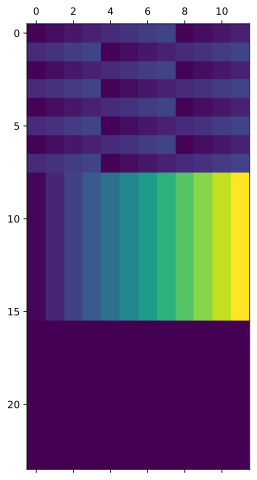

In [118]:
encoders = []
bottel = []
for i in range(12):
  for k in bott:
    bottel.append(k)
for i in range(8):
  for z in encod:
    encoders.append(z)

mat = np.concatenate((np.array(bottel),np.array(encoders),np.array(losses_real))).reshape(3*8,int(96/8))
plt.matshow(mat)


# Additional explorations

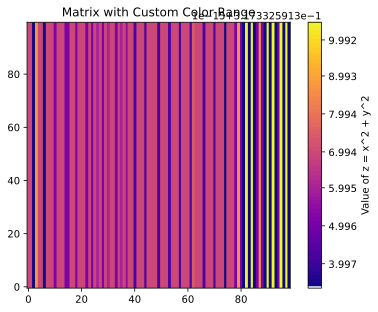

In [95]:

python
Копировать код
plt.imshow(z, cmap='plasma', origin='lower', vmin=0, vmax=50)
plt.colorbar(label='Value of z = x^2 + y^2')  # Добавляем шкалу
plt.title("Matrix with Custom Color Range")
plt.show()

In [ ]:
# 1) Because these are continuous data, mean-squared-error is the correct loss function. But I mentioned in the previous
#    video that binary cross-entropy loss is *sometimes* used in autoencoders. Does the loss function make a difference
#    for this problem? Why?
#
# 2) Change the number of units in the latent layer to 10. How does that affect the loss and denoising? Don't turn this
#    into a full parametric experiment -- that's for the next video!
#
# 3) The code here picks samples randomly, which means many samples are skipped, and some could be repeated. Change the
#    code so that the model goes through every item exactly once per epoch. The order should be randomized to avoid
#    possible order effects. You'll probably want to reduce the number of epochs!
#
# 4) Is it necessary to normalize the data to a range of [0 1]? What are arguments for normalization, and arguments why
#    it may not be critical (in this problem)?
#
# 5) The autoencoder did a pretty decent job at denoising the images. How far can you push this? Try adding more noise
#    to the images and re-running the test code (you don't need to retrain the model). Is the autoencoder robust to a
#    a larger amount of noise?
#